# Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from itertools import combinations
from scipy.stats import ttest_ind

# DATA

In [2]:
DATA_DIR = './'
data = pd.read_csv(DATA_DIR+'stud_math.xls')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Первоначальное описание колонок:
1 **school** — аббревиатура школы, в которой учится ученик;

2 **sex** — пол ученика (**'F'** - женский, **'M'** - мужской);

3 **age** — возраст ученика (от **15** до **22**);

4 **address** — тип адреса ученика (**'U'** - городской, **'R'** - за городом);

5 **famsize** — размер семьи(**'LE3'** <= 3, **'GT3'** >3);

6 **p_status** — статус совместного жилья родителей (**'T'** - живут вместе **'A'** - раздельно);

7 **m_edu** — образование матери (**0** - нет, **1** - 4 класса, **2** - 5-9 классы,
    **3** - среднее специальное или 11 классов, **4** - высшее);

8 **f_edu** — образование отца (**0** - нет, **1** - 4 класса, **2** - 5-9 классы, 
    **3** - среднее специальное или 11 классов, **4** - высшее);

9 **m_job** — работа матери (**'teacher'** - учитель, **'health'** - сфера здравоохранения, 
    **services'** - гос служба, **'at_home'** - не работает, **'other'** - другое);

10 **f_job** — работа отца (**'teacher'** - учитель, **'health'** - сфера здравоохранения, 
    **'services'** - гос служба, **'at_home'** - не работает, **'other'** - другое);

11 **reason** — причина выбора школы (**'home'** - близость к дому, **'reputation'** - репутация школы, 
    **'course'** - образовательная программа, **'other'** - другое);

12 **guardian** — опекун (**'mother'** - мать, **'father'** - отец, **'other'** - другое);

13 **traveltime** — время в пути до школы (**1** - <15 мин., **2** - 15-30 мин., 
    **3** - 30-60 мин., **4** - >60 мин.);

14 **studytime** — время на учёбу помимо школы в неделю (**1** - <2 часов, **2** - 2-5 часов, 
    **3** - 5-10 часов, **4** - >10 часов);

15 **failures** — количество внеучебных неудач (**n**, если 1<=n<3, иначе **4**);

16 **schoolsup** — дополнительная образовательная поддержка (**yes** или **no**);

17 **famsup** — семейная образовательная поддержка (**yes** или **no**);

18 **paid** — дополнительные платные занятия по математике (**yes** или **no**);

19 **activities** — дополнительные внеучебные занятия (**yes** или **no**);

20 **nursery** — посещал детский сад (**yes** или **no**);

**studytime_granular** - неизвестная колонка, необходимо понять, с чем она коррелирует

21 **higher** — хочет получить высшее образование (**yes** или **no**);

22 **internet** — наличие интернета дома (**yes** или **no**);

23 **romantic** — в романтических отношениях (**yes** или **no**);

24 **famrel** — семейные отношения (от **1** - очень плохо до **5** - очень хорошо);

25 **freetime** — свободное время после школы (от **1** - очень мало до **5** - очень мого);

26 **goout** — проведение времени с друзьями (от **1** - очень мало до **5** - очень много);

27 **health_level** — текущее состояние здоровья (от **1** - очень плохо до **5** - очень хорошо);

28 **absences** — количество пропущенных занятий;

29 **score** — баллы по госэкзамену по математике (целевой параметр).

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

#  EDA  
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками. В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой. 
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

## Анализ признаков
* Строим графики
* Проводим корреляционный анализ
* Находим дублирующиеся признаки
* Находим выбросы
* Cмотрим распределение целевой переменной
* Распределение целевой переменной относительно признаков
* Находим Возможные закономерности и взаимосвязи

### Анализ числовых признаков

In [5]:
def description_num(column):
    '''Функция возвращает описательную статистику для числовых признаков'''
    display(data[column].unique())
    display(data[column].describe())
    data[column].hist() 
    return data.loc[:,[column]].info()

In [6]:
def cleaner(column):
    '''Функция заполняет пропуски в данных, заменяя их на медианное значение'''
    data[column]=data[column].fillna(data[column].median()) 
    return

In [7]:
def outlier_detection(column):
    '''Функция находит выбросы в распределении числового признака и заменяет их на медианное значение'''
    median = data[column].median()
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    data[column].loc[data[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 15,  label = 'IQR')
    plt.legend()
    return #data[column].apply(lambda x: median if x>perc75 + 1.5*IQR or x<perc25-1.5*IQR else x)

#### Age

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


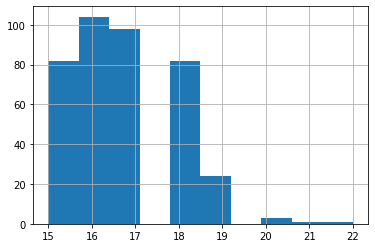

In [8]:
description_num('age')

Средний возраст ученика - 16,7 лет. В этом признаке нет пропусков, однако возможно присутствуют выбросы - нескольким ученикам больше 20 лет, что значительно больше среднего. Проверим это:

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


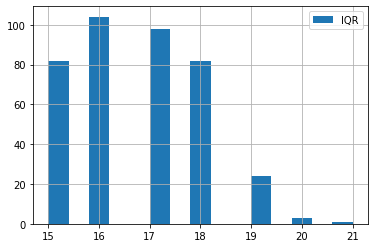

In [9]:
outlier_detection('age')

Значения 20 и 21 год не были признаны выбросами, поэтому можно оставить их без изменений.

#### Medu

array([ 4.,  1.,  3.,  2., nan,  0.])

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


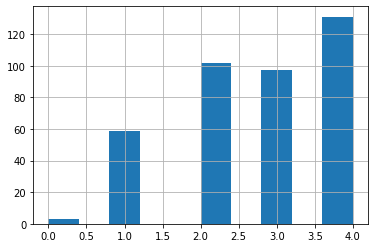

In [10]:
description_num('Medu')

Уберем пропущенные значения, изменим тип данных на int (так как они категориальные) и посмотрим на распределение признака:

In [11]:
cleaner('Medu')

In [12]:
data.Medu=data.Medu.astype(int)

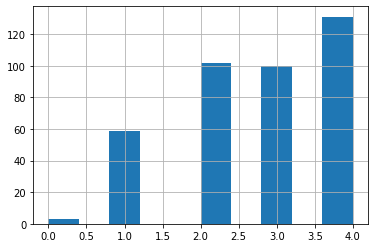

In [13]:
data.Medu.hist()

Как видно из гистограммы, у большиство учеников матери имеют высшее образование.

#### Fedu

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


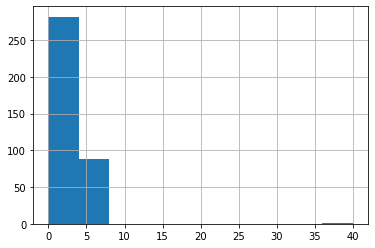

In [14]:
description_num('Fedu')

Одно из значений стобца равно 40, что выходит за рамки пятибальной шкалы оценивания - очевидно, что допущена опечатка - ее стоит исправить (заменить на 4).

In [15]:
data.Fedu=data.Fedu.apply(lambda x: 4 if x==40 else x)

Также заполним пропущенные значения и изменим тип данных на int:

In [16]:
cleaner('Fedu')

In [17]:
data.Fedu=data.Fedu.astype(int)

Теперь посмотрим на распределение признака:

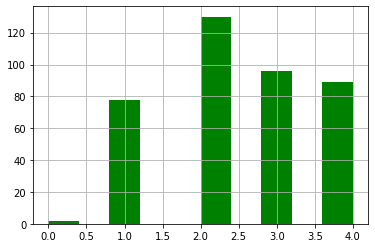

In [18]:
data.Fedu.hist(color='green')

У большинства учеников отцы имеют неполное школьное образование (5-9 классов).

#### Traveltime

array([ 2.,  1.,  3., nan,  4.])

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


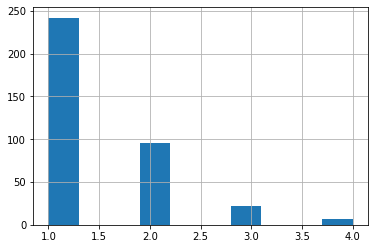

In [19]:
description_num('traveltime')

Признак содержит пустые значения - заполним их:

In [20]:
cleaner('traveltime')

Так как это категориальный признак, поменяем тип данных на int:

In [21]:
data.traveltime=data.traveltime.astype(int)

У большинства учеников дорога занимает до 15 минут.

#### Studytime

array([ 2.,  3.,  1., nan,  4.])

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


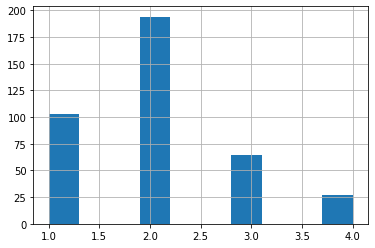

In [22]:
description_num('studytime')

Вновь заполняем пропуски:

In [23]:
cleaner('studytime')

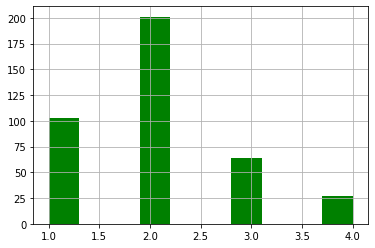

In [24]:
data['studytime'].hist(color='green')

Итого, большинство учеников тратят на учебу помимо школы от 2 до 5 часов в неделю.

#### Failures (количество внеучебных задач)

array([ 0.,  3., nan,  2.,  1.])

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


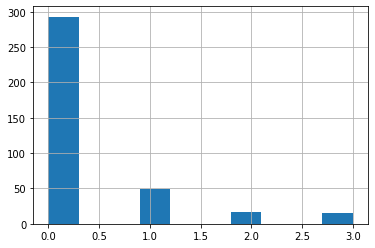

In [25]:
description_num('failures')

У большинства учеников нет внеучебных задач+есть пропущенные значения, заполним их:

In [26]:
cleaner('failures')

#### Studytime, granular

array([ -6.,  -9.,  -3.,  nan, -12.])

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


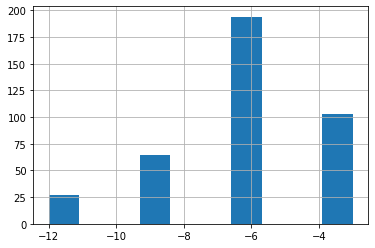

In [27]:
description_num('studytime, granular')

Пока не ясно, что значит этот признак, но видно, что в нем также есть пропущенные значения. Пока не будем их заполнять.

#### Famrel

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


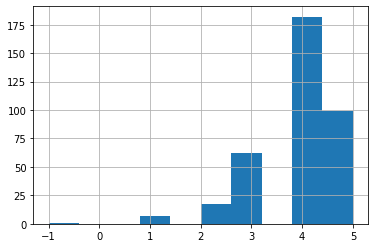

In [28]:
description_num('famrel')

Очевидно, что в данных присутствует выброс, а точнее опечатка (-1), так как такого варианта нет в изначальных вариантах ответа. Заменим ее на медианное значение и заполним пропуски:

In [29]:
cleaner('famrel')

In [30]:
data.famrel=data.famrel.astype(int).replace(-1,data.famrel.median())

Посмотрим на гистограмму распределения признака еще раз:

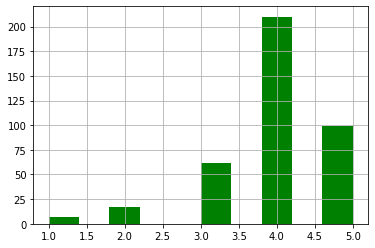

In [31]:
data.famrel.hist(color='green')

Таким образом, большинство учеников оценили отношения в своей семье на "четверку".

#### Freetime

array([ 3.,  2.,  4.,  1.,  5., nan])

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


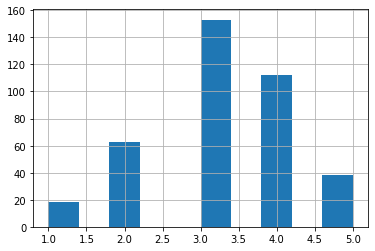

In [32]:
description_num('freetime')

In [33]:
cleaner('freetime')

In [34]:
data.freetime=data.freetime.astype(int)

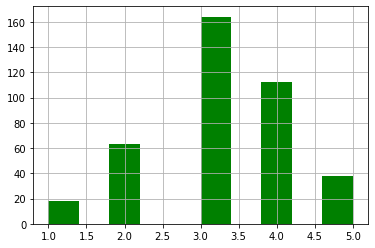

In [35]:
data.freetime.hist(color='green')

Похоже, что распределение признака близко к нормальному.

#### Goout

array([ 4.,  3.,  2.,  1.,  5., nan])

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


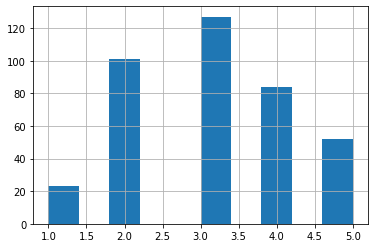

In [36]:
description_num('goout')

Заполняем пропуски:

In [37]:
cleaner('goout')

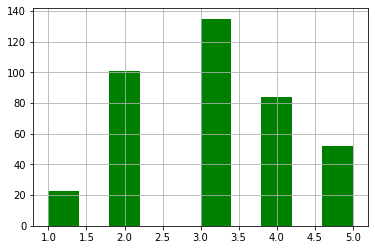

In [38]:
data['goout'].hist(color='green')

Распределение данного признака также близко к нормальному.

#### Health

Сразу заполним пропуски и посмотрим на описательную статистику:

array([3., 5., 1., 2., 4.])

count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


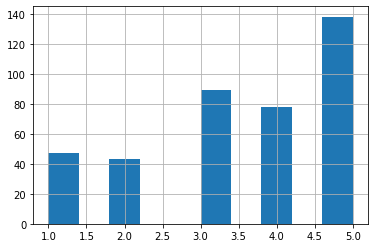

In [39]:
cleaner('health')
description_num('health')

Большинство учеников оценивают свое здоровье как "очень хорошее".

#### Absences

array([  6.,   4.,  10.,   2.,   0.,  16.,  14.,   7.,   8.,  25.,  12.,
        54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
         3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,  40.,
        23.,  17., 212.])

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


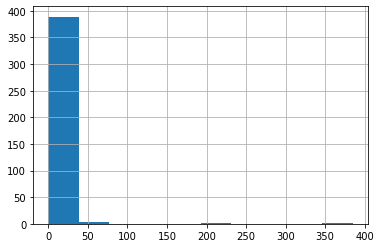

In [40]:
cleaner('absences')
description_num('absences')

In [41]:
data.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  14.,   7.,   8.,  25.,  12.,
        54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
         3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,  40.,
        23.,  17., 212.])

Исходя из описательной статистики, у большинства учеников не было пропусков в течение учебного года. Однако, есть несколько значений, которые скорее всего можно считать экстремально высокими (212 и 385).

Определим границы выбросов и заменим выявленные выбросы на медианные значения. 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


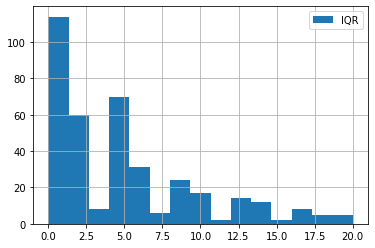

In [42]:
median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data.absences.loc[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 15,  label = 'IQR')
plt.legend()

Очевидно, что выбранные нами значения (212 и 385) находятся за пределами данного рассчитанного интервала, а значит являются выбросами - их можно удалить и посмотреть на распределение признака еще раз.

In [43]:
data.absences=data.absences.apply(lambda x: median if x>perc75 + 1.5*IQR or x<perc25-1.5*IQR else x)

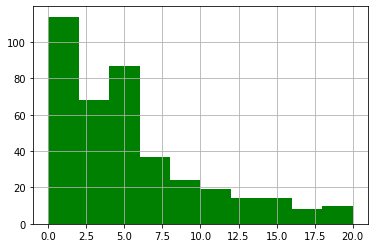

In [44]:
data.absences.hist(color='green')

Признак имеет левостороннее распределение.

### Анализ номинативных признаков

In [45]:
def description_cat(column):
    '''Функция возвращает описательную статистику для номинативных (категориальных) признаков'''
    display(data[column].unique())
    display(data[column].value_counts())
    return data.loc[:,[column]].info()

In [46]:
def cleaner_cat(row):
    '''Функция заполняет пропущенные значения и 'nan' на None'''
    if pd.isnull(row):
        return None
    elif row.strip()=='':
        return None 
    else:
        return row

#### School

In [48]:
description_cat('school')

array(['GP', 'MS'], dtype=object)

GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Большинство ребят учатся в школе GP, пустые значения отсутствуют.

#### Sex

In [49]:
description_cat('sex')

array(['F', 'M'], dtype=object)

F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Мальчиков и девочек примерно равное количество, девочек чуть больше. Пустые значения отсутствуют.

#### Address

In [50]:
description_cat('address')

array(['U', nan, 'R'], dtype=object)

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Здесь присутствуют пропущенные значения, заменим их на None.

In [51]:
data['address']=data['address'].apply(cleaner_cat)

#### Famsize (размер семьи)

In [52]:
description_cat('famsize')

array([nan, 'GT3', 'LE3'], dtype=object)

GT3    261
LE3    107
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В колонке присутствуют пропущенные значения. 70% учеников из "больших" семей (от 3 человек) и меньше 30% из "маленьких"

In [53]:
data['famsize']=data['famsize'].apply(cleaner_cat)

#### Pstatus (статус совместного жилья родителей)

In [54]:
description_cat('Pstatus')

array(['A', nan, 'T'], dtype=object)

T    314
A     36
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


У большинства учеников родители живут вместе. Однако признак имеет пропущенные значения.

In [55]:
data['Pstatus']=data['Pstatus'].apply(cleaner_cat)

#### Mjob

In [56]:
description_cat('Mjob')

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В признаке также пропущены некоторые значения.

In [57]:
data['Mjob']=data['Mjob'].apply(cleaner_cat)

#### Fjob

In [58]:
description_cat('Fjob')

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Признак вновь имеет пропущенные значения.

In [59]:
data['Fjob']=data['Fjob'].apply(cleaner_cat)

#### Reason (причина выбора школы)

In [60]:
description_cat('reason')

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В признаке есть пропущенные значения.
Обратим внимание, что для большинства учеников причиной выбора школы стала именно образовательная программа, а не близость к дому или репутация.

In [61]:
data.reason=data.reason.apply(cleaner_cat)

#### Guardian

In [94]:
description_cat('guardian')

array(['mother', 'father', 'other', None], dtype=object)

mother    248
father     86
other      24
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  358 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


У большинства учеников опекунов является мать. Есть пропущенные значения.

In [63]:
data.guardian=data.guardian.apply(cleaner_cat)

#### Schoolsup

In [64]:
description_cat('schoolsup')

array(['yes', 'no', nan], dtype=object)

no     335
yes     51
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [65]:
data.schoolsup=data.schoolsup.apply(cleaner_cat)

У большинства учеников нет дополнительной образовательной поддержки.

#### Famsup

In [66]:
description_cat('famsup')

array(['no', 'yes', nan], dtype=object)

yes    219
no     137
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [67]:
data.famsup=data.famsup.apply(cleaner_cat)

У большинства учеников есть образовательная поддержка со стороны семьи.

#### Paid

In [68]:
description_cat('paid')

array(['no', nan, 'yes'], dtype=object)

no     200
yes    155
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [69]:
data.paid=data.paid.apply(cleaner_cat)

Чуть больше половины учеников посещают дополнительные занятия по математике.

#### Activities

In [70]:
description_cat('activities')

array(['no', 'yes', nan], dtype=object)

yes    195
no     186
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [71]:
data.activities=data.activities.apply(cleaner_cat)

Половина учеников посещает дополнительные занятия, а вторая половина - нет.

#### Nursery

In [72]:
description_cat('nursery')

array(['yes', 'no', nan], dtype=object)

yes    300
no      79
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [73]:
data.nursery=data.nursery.apply(cleaner_cat)

Большая часть учеников ранее посещали детский сад.

#### Higher

In [74]:
description_cat('higher')

array(['yes', nan, 'no'], dtype=object)

yes    356
no      19
Name: higher, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [75]:
data.higher=data.higher.apply(cleaner_cat)

In [76]:
data['higher'].value_counts(normalize=True)

yes    0.949333
no     0.050667
Name: higher, dtype: float64

Почти 95% учеников планируют получить высшее образование.

#### Internet

In [77]:
description_cat('internet')

array([nan, 'yes', 'no'], dtype=object)

yes    305
no      56
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [78]:
data.internet=data.internet.apply(cleaner_cat)

У большинства учеников дома есть интернет.

#### Romantic

In [79]:
description_cat('romantic')

array(['no', nan, 'yes'], dtype=object)

no     240
yes    124
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [80]:
data.romantic=data.romantic.apply(cleaner_cat)

Примерно 2/3 учеников состоят в романтических отношениях.

### Анализ целевой переменной (score)

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


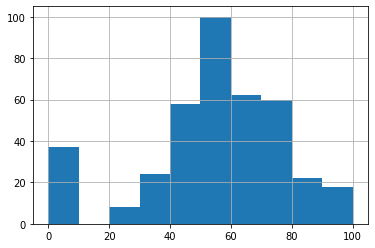

In [81]:
description_num('score')

In [82]:
data['score'].unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

В целевой переменной есть неизвестные значения, которые будут мешать при построении модели - удалим их.

In [83]:
data=data[data.score.notnull()]

Выведем описательную статистику:

In [84]:
data['score'].describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Из описательной статистики видно, что оценка за экзамен по математике у учеников из нашей выборки колеблется от 0 до 100 (что скорее всего соответствует минимальному и максимальному количеству баллов за экзамен в целом).

При этом средний балл составляет 52 балла, а медиана равна 55 баллам - отсюда можно сделать вывод, что доля учеников, которые сдают экзамен выше среднего превышает долю тех, кто показывает результат ниже среднего.

Теперь посмотрим на распределение переменной:

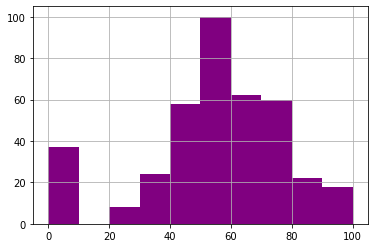

In [85]:
data.score.hist(color='purple')

## Корреляционный анализ

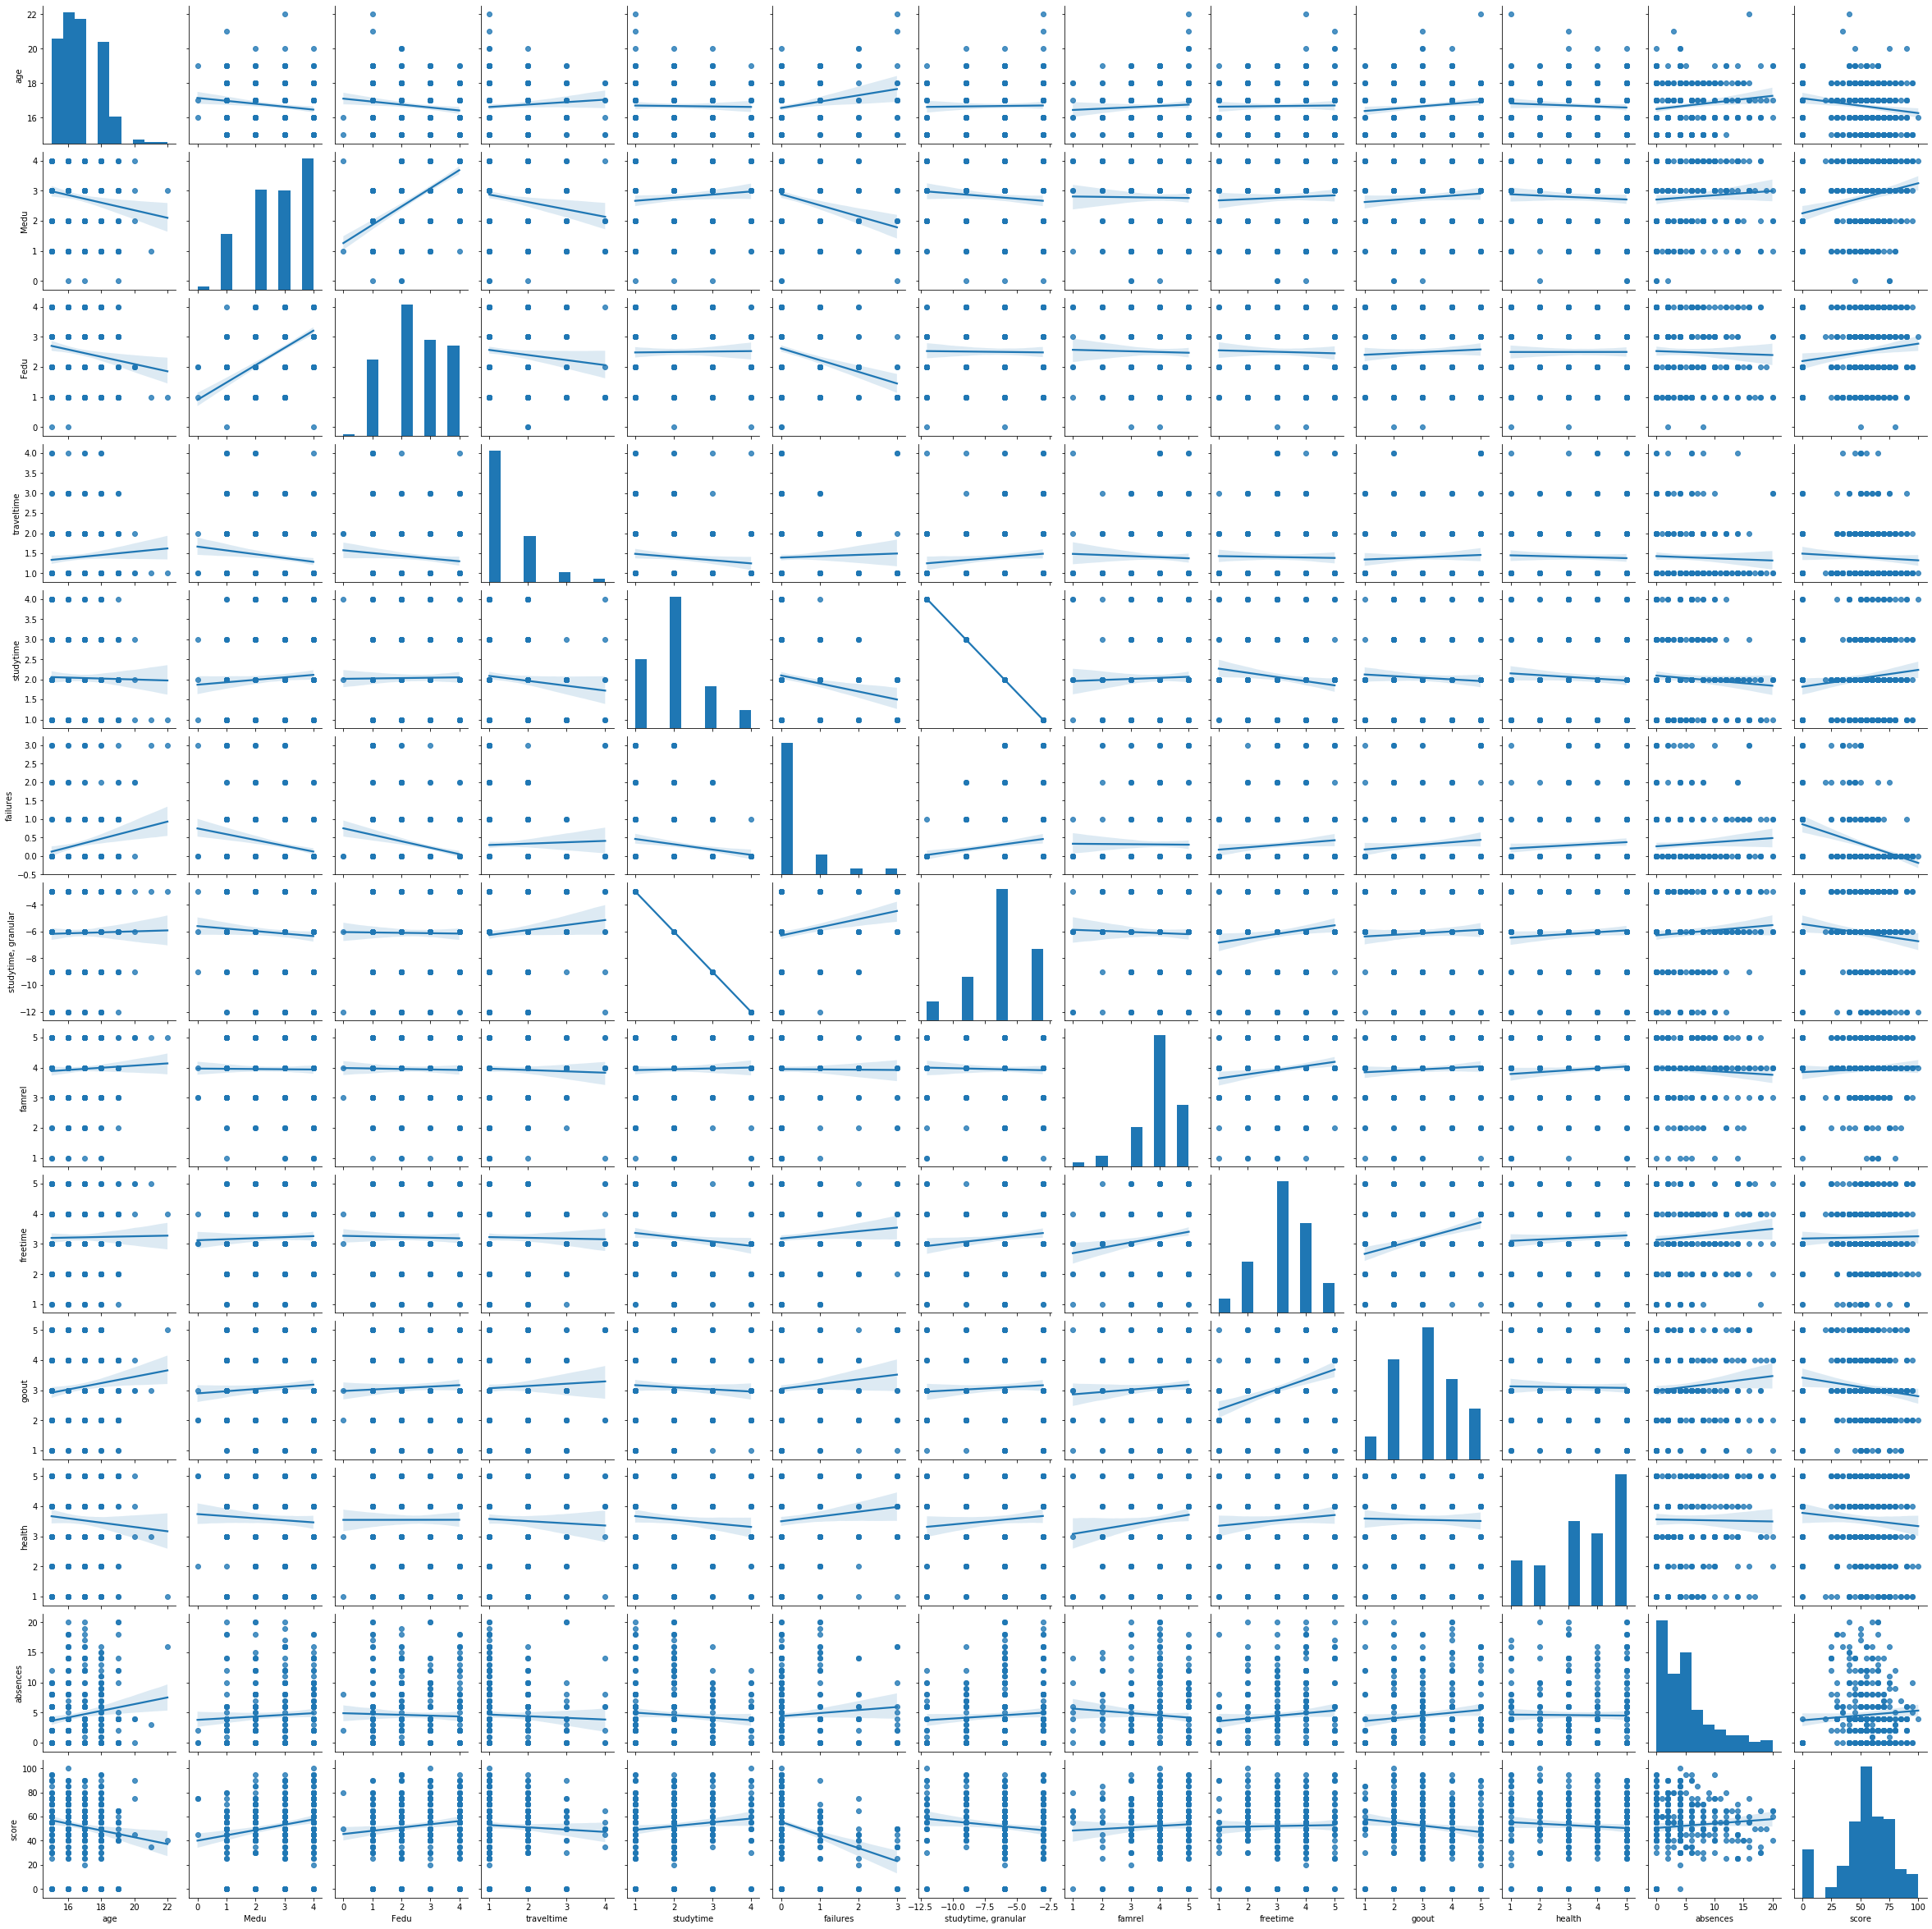

In [86]:
sns.pairplot(data, kind = 'reg')

Посмотрим на коэффициенты корреляции:

In [87]:
#Находим дублирующиеся признаки
abs(data.corr())

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,0.146405,0.143849,0.076013,0.018019,0.206279,0.018227,0.053021,0.013994,0.121057,0.065719,0.145603,0.155726
Medu,0.146405,1.000000,0.589360,0.152597,0.079513,0.239668,0.080125,0.009936,0.037699,0.071235,0.054431,0.062878,0.209758
Fedu,0.143849,0.589360,1.000000,0.107267,0.011723,0.260794,0.011778,0.019910,0.022669,0.046401,0.000566,0.029866,0.124829
traveltime,0.076013,0.152597,0.107267,1.000000,0.098226,0.035113,0.099356,0.034992,0.016696,0.046390,0.035852,0.038650,0.056535
studytime,0.018019,0.079513,0.011723,0.098226,1.000000,0.169399,1.000000,0.027460,0.122057,0.053554,0.072790,0.072086,0.114295
failures,0.206279,0.239668,0.260794,0.035113,0.169399,1.000000,0.170933,0.007672,0.087558,0.101036,0.082165,0.075324,0.337187
"studytime, granular",0.018227,0.080125,0.011778,0.099356,1.000000,0.170933,1.000000,0.027886,0.123897,0.054087,0.073349,0.072346,0.115741
famrel,0.053021,0.009936,0.019910,0.034992,0.027460,0.007672,0.027886,1.000000,0.156171,0.061699,0.099614,0.066882,0.048896
freetime,0.013994,0.037699,0.022669,0.016696,0.122057,0.087558,0.123897,0.156171,1.000000,0.294450,0.063718,0.089441,0.017481
goout,0.121057,0.071235,0.046401,0.046390,0.053554,0.101036,0.054087,0.061699,0.294450,1.000000,0.016427,0.105465,0.127742


Оставим только те, где абсолютное значение коэффициента больше 0.5:

In [88]:
data.corr()[abs(data.corr())>0.5]

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.00000,0.58936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,0.58936,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
failures,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"studytime, granular",NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
famrel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
goout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


Коэффициент корреляции между признаками Fedu и Medu равен 0.58, то есть эти признаки тесно связаны - следовательно, в рамках нашей модели мы можем оставить только один из признаков, например, образование матери (у этого признака изначально было больше ненулевых значений).

Также, обратим внимание, что неизвестный нам признак "studytime, granular" по коэффициенту корреляции прямо противоложен признаку "studytime". Сложно сказать, что именно значит этот признак, однако это по сути не имеет значения, так как при таком коэффициенте корреляции между двумя признаками имеет смысл оставить только один из них - пусть это будет studytime (для возможности интерпретации результатов в дальнейшем).

## Анализ значимости номинативных переменных

In [89]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

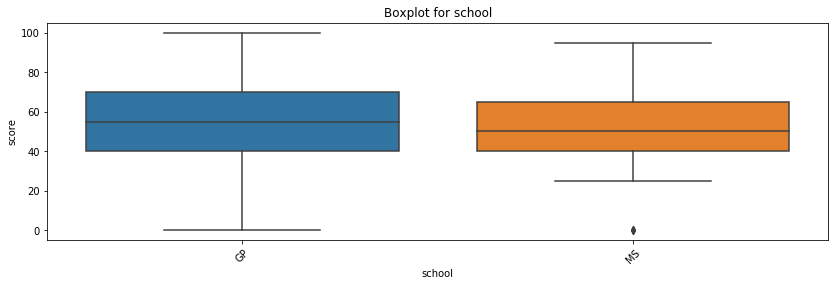

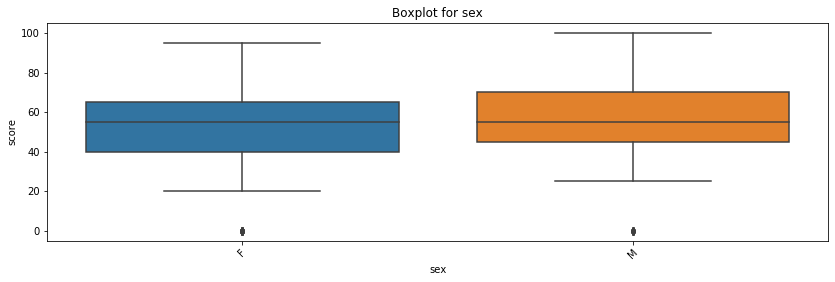

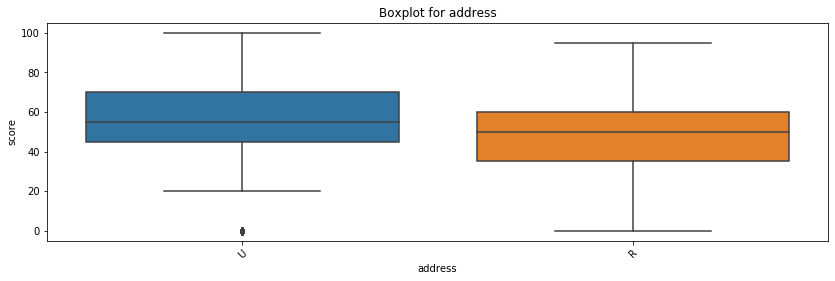

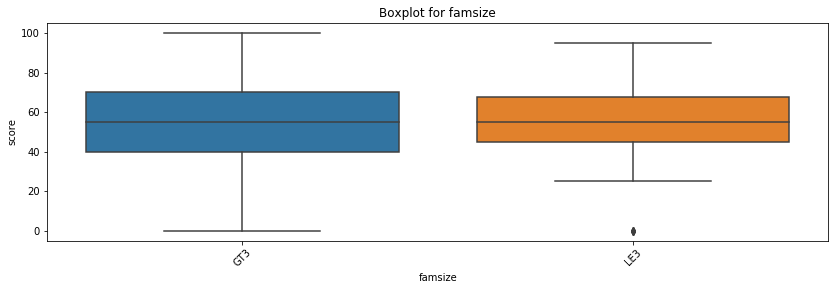

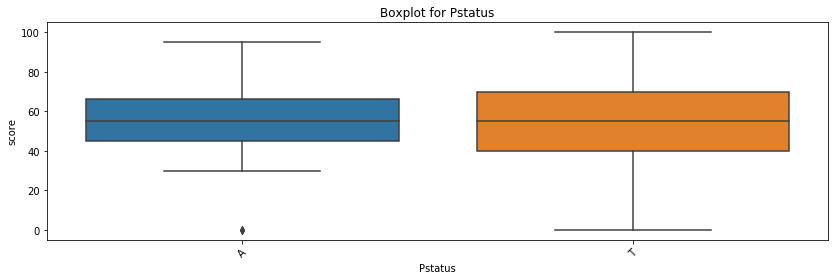

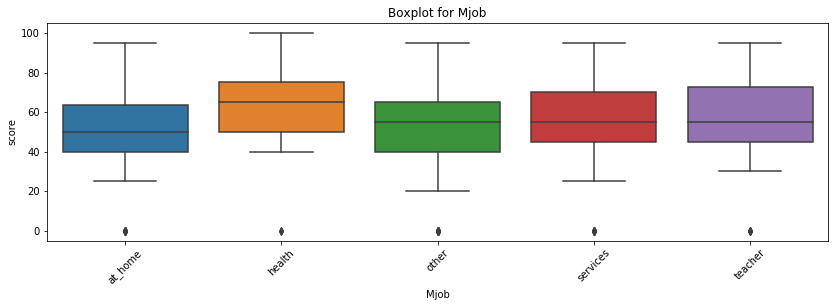

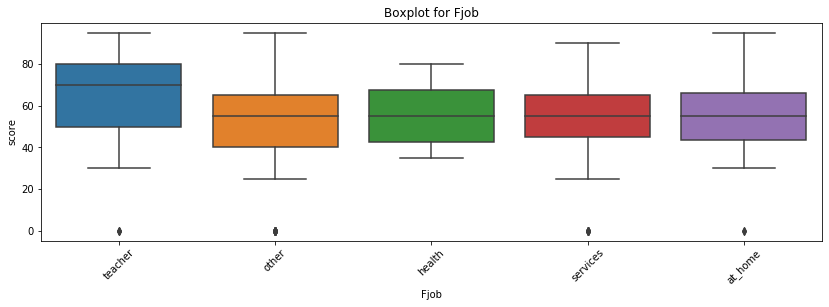

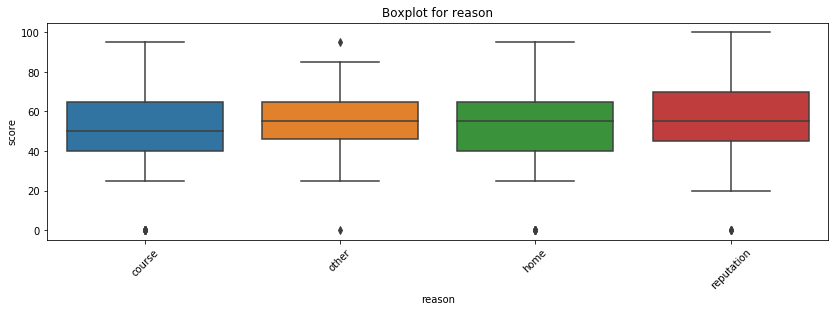

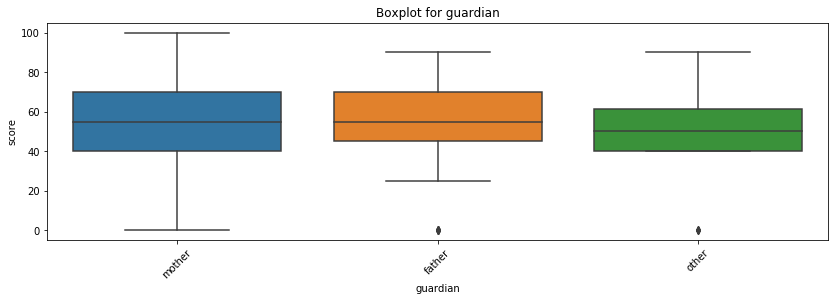

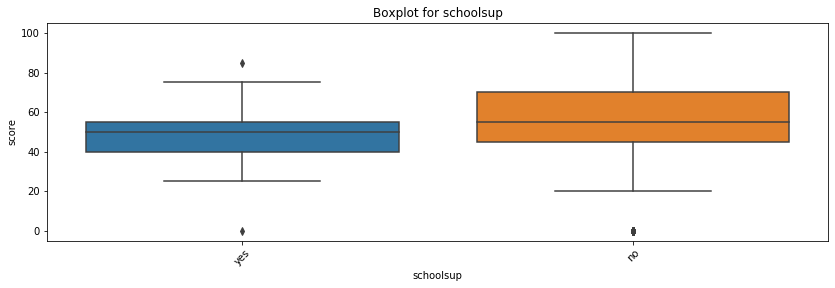

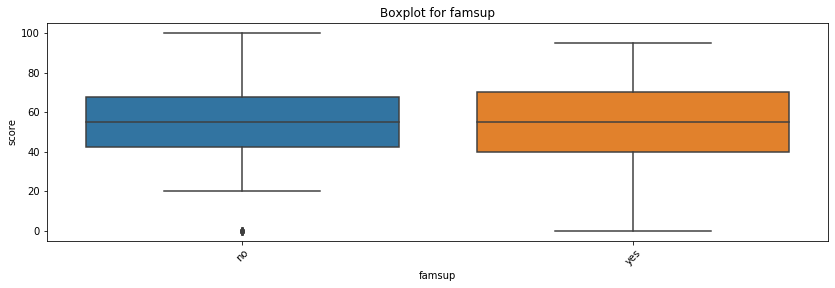

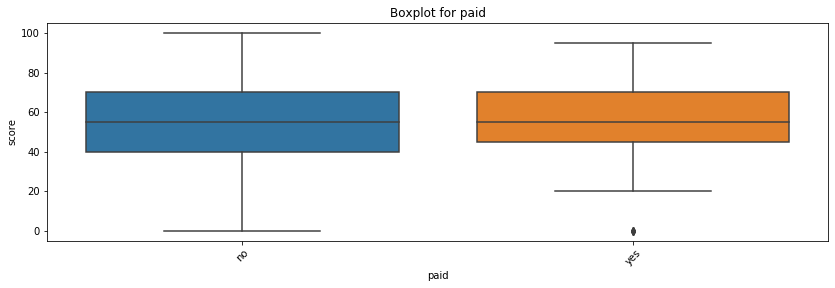

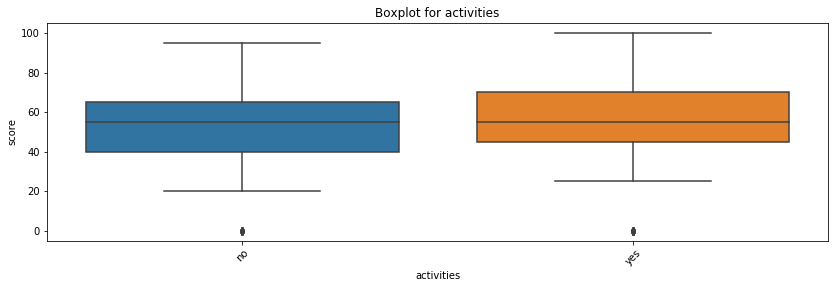

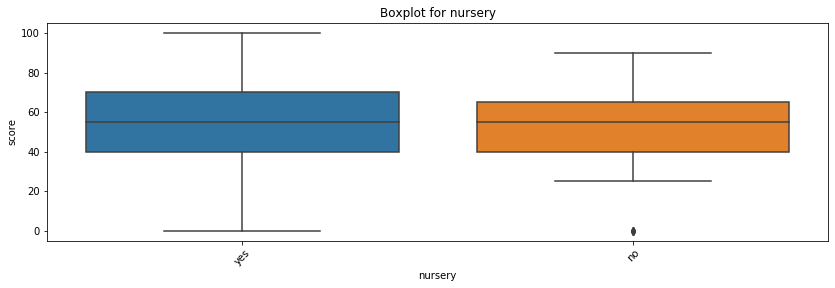

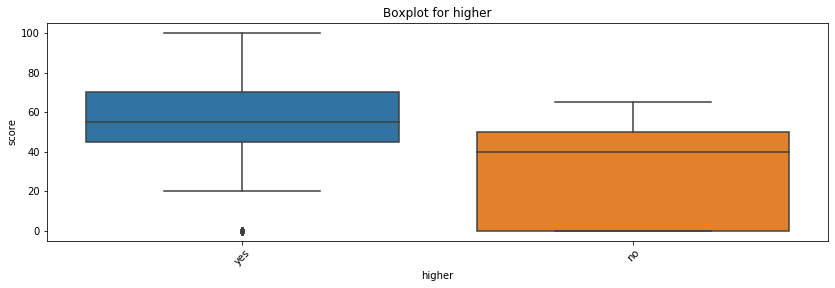

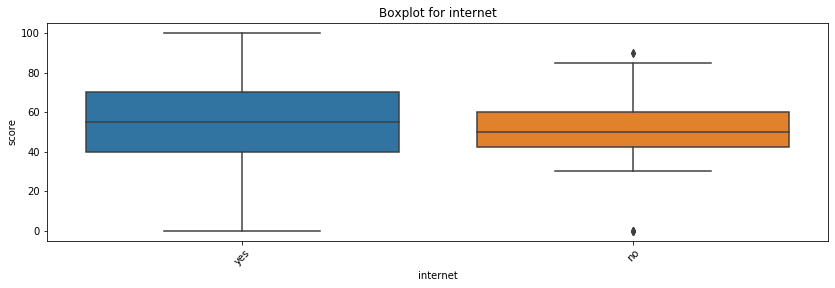

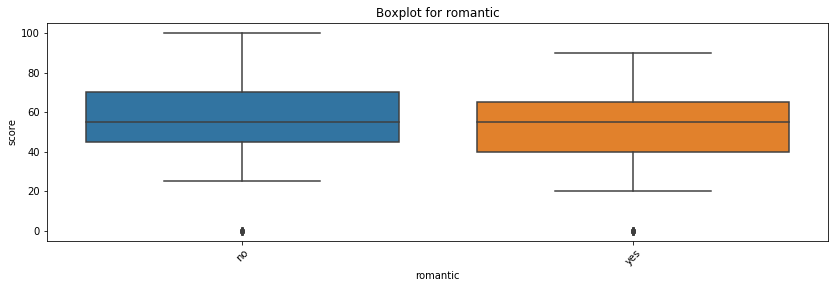

In [90]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher', 'internet','romantic']:
    get_boxplot(col)

Исходя из графиков можно предположить, что наибольшее влияние на оценку за экзамен по математике могут оказывать такие параметры, как работа матери (Mjob), работа отца (Fjob) и желание ученика получить высшее образование (higher). 

Тогда как такие признаки, как размер семьи (famsize), отношения родителей (Pstatus), поддержка со стороны семьи (famsup) и посещение платных занятий по математике (paid), скорее всего не будут оказывать никакого влияния на целевую переменную.

Проверим нашу гипотезу с помощью теста Стьюдента:

In [91]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [92]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher', 'internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Тест Стьюдента показал несколько другие результаты: значимыми оказались различия в месте жительства, работе матери, отношении к высшему образованию и личной жизни учеников - именно эти параметры стоит включить в модель.

## Выводы

Таким образом, для построения модели были отобраны следующие признаки: 
- **age** (возраст)
- **address** (место жительства)
- **Medu** (образование матери)
- **Mjob** (работа матери)
- **traveltime** (время на дорогу до школы)
- **studytime** (учебное время вне школы) 
- **failures** (количество внеучебных задач)
- **higher** (планы получать высшее образование)
- **romantic** (роматические отношения)
- **famrel** (отношения в семье)
- **freetime** (свободное время) 
- **goout** (встречи с друзьями) 
- **health** (самочувствие)
- **absences** (пропуски занятий)

In [93]:
data_for_model = data.loc[:, ['age', 'address', 'Medu', 'Mjob','traveltime', 'studytime','failures','higher','romantic','famrel','freetime','goout','health','absences']]
data_for_model.head()

,age,address,Medu,Mjob,traveltime,studytime,failures,higher,romantic,famrel,freetime,goout,health,absences
0,18,U,4,at_home,2,2.0,0.0,yes,no,4,3,4.0,3.0,6.0
1,17,U,1,at_home,1,2.0,0.0,yes,no,5,3,3.0,3.0,4.0
2,15,U,1,at_home,1,2.0,3.0,yes,None,4,3,2.0,3.0,10.0
3,15,U,4,health,1,3.0,0.0,yes,yes,3,2,2.0,5.0,2.0
4,16,U,3,other,1,2.0,0.0,yes,no,4,3,2.0,5.0,4.0
